
Gendered + Neutral Term Counts by Article

Article ID  Female Term Count  Male Term Count  Neutral Term Count
         1                  9                4                   3
         2                 40               11                  11
         3                  6               21                  11
         4                  2               33                  23
         5                 84               70                  23
         6                  2               10                   6
         7                  7               44                   9
         8                  3               13                  33
         9                 64               10                   4
        10                158               17                  18
        11                 16                4                  20
        12                  8               24                   9
        13                  0               17                   3
        14        

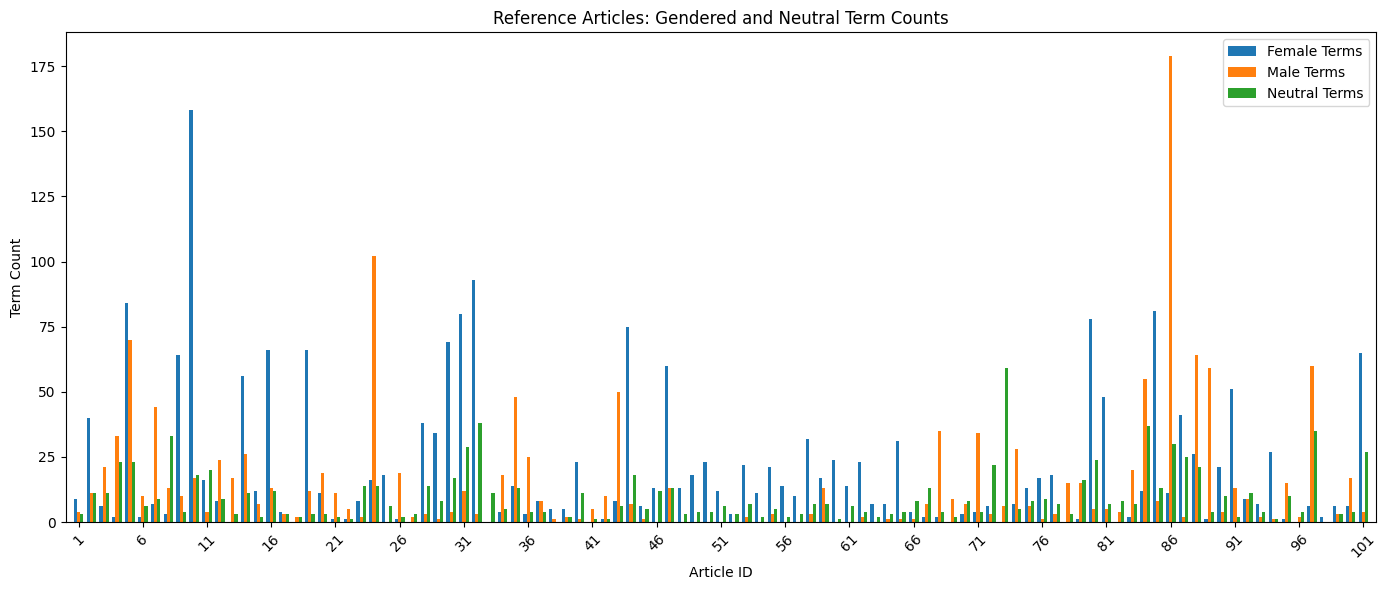

In [96]:
import ast
import re
import matplotlib.pyplot as plt
import pandas as pd

# Load article data
file_path = 'nyt_ref_articles.json'
with open(file_path, 'r', encoding='utf-8') as f:
    file_content = f.read()
articles = ast.literal_eval(file_content)
if isinstance(articles, list):
    articles = dict(enumerate(articles, start=1))

# Define term lists
female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]
neutral_terms = [
    'they', 'them', 'their', 'theirs', 'themselves',
    'parent', 'parents', 'child', 'children', 'sibling', 'siblings',
    'person', 'people', 'individual', 'individuals',
    'spouse', 'partner', 'partners',
    'cousin', 'cousins'
]

# Compile regex patterns
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)
neutral_terms_pattern = re.compile(r'\b(' + '|'.join(neutral_terms) + r')\b', flags=re.IGNORECASE)

# Count term matches per article
article_ids = []
female_counts = []
male_counts = []
neutral_counts = []

for article_id, article_text in articles.items():
    f_count = len(female_terms_pattern.findall(article_text))
    m_count = len(male_terms_pattern.findall(article_text))
    n_count = len(neutral_terms_pattern.findall(article_text))
    
    article_ids.append(article_id)
    female_counts.append(f_count)
    male_counts.append(m_count)
    neutral_counts.append(n_count)

# Create dataframe
counts_df = pd.DataFrame({
    "Article ID": article_ids,
    "Female Term Count": female_counts,
    "Male Term Count": male_counts,
    "Neutral Term Count": neutral_counts
})

print("\nGendered + Neutral Term Counts by Article\n")
print(counts_df.to_string(index=False))

fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.25

# Convert article_ids to numeric type if needed
article_ids_numeric = list(map(int, article_ids))

# Plot each bar group directly using article IDs
ax.bar(
    [aid - bar_width for aid in article_ids_numeric],
    female_counts, width=bar_width, label='Female Terms'
)
ax.bar(
    article_ids_numeric,
    male_counts, width=bar_width, label='Male Terms'
)
ax.bar(
    [aid + bar_width for aid in article_ids_numeric],
    neutral_counts, width=bar_width, label='Neutral Terms'
)

ax.set_xlabel('Article ID')
ax.set_ylabel('Term Count')
ax.set_title('Reference Articles: Gendered and Neutral Term Counts')

# Show every Nth x-tick
N = 5
ax.set_xticks([aid for i, aid in enumerate(article_ids_numeric) if i % N == 0])
ax.set_xticklabels([aid for i, aid in enumerate(article_ids_numeric) if i % N == 0], rotation=45)

ax.set_xlim(min(article_ids_numeric) - 1, max(article_ids_numeric) + 1)
ax.legend()
plt.tight_layout()
plt.show()



 DeepSeek Articles - Gendered and Neutral Term Counts 
Article ID  Female Term Count  Male Term Count  Neutral Term Count
         1                  1                0                   3
         2                  1                0                   4
         3                  0                0                   0
         4                  1                0                   4
         5                  0                8                   1
         6                  2                0                   1
         7                  0                0                   7
         8                  0                0                   3
         9                 13                2                   0
        10                  1                0                   0
        11                 13                0                   1
        12                  2                1                   0
        13                  0                0                   3
      

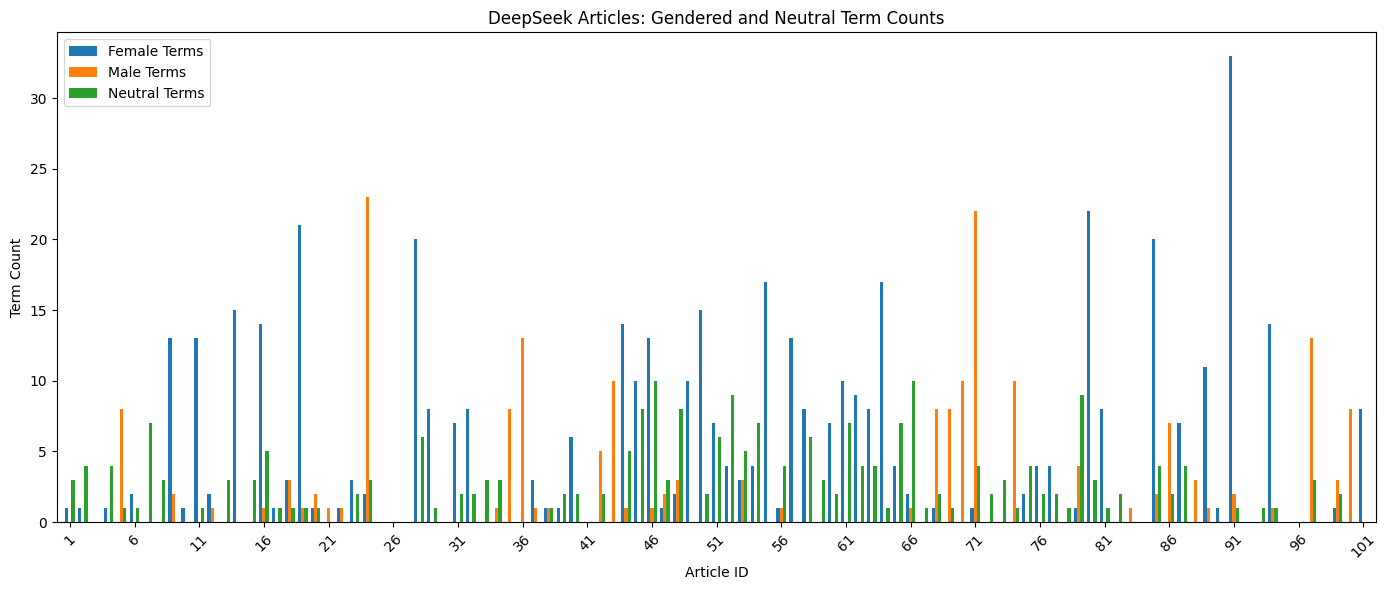


 Claude Articles - Gendered and Neutral Term Counts 
Article ID  Female Term Count  Male Term Count  Neutral Term Count
         1                  0                0                   1
         2                  0                0                   1
         3                  0                0                   0
         4                  0                0                   4
         5                  1               10                   1
         6                  0                4                   0
         7                  0                4                   0
         8                  0                0                   3
         9                 13                0                   0
        10                  2                0                   1
        11                 11                0                   2
        12                  0                2                   0
        13                  0                0                   2
        

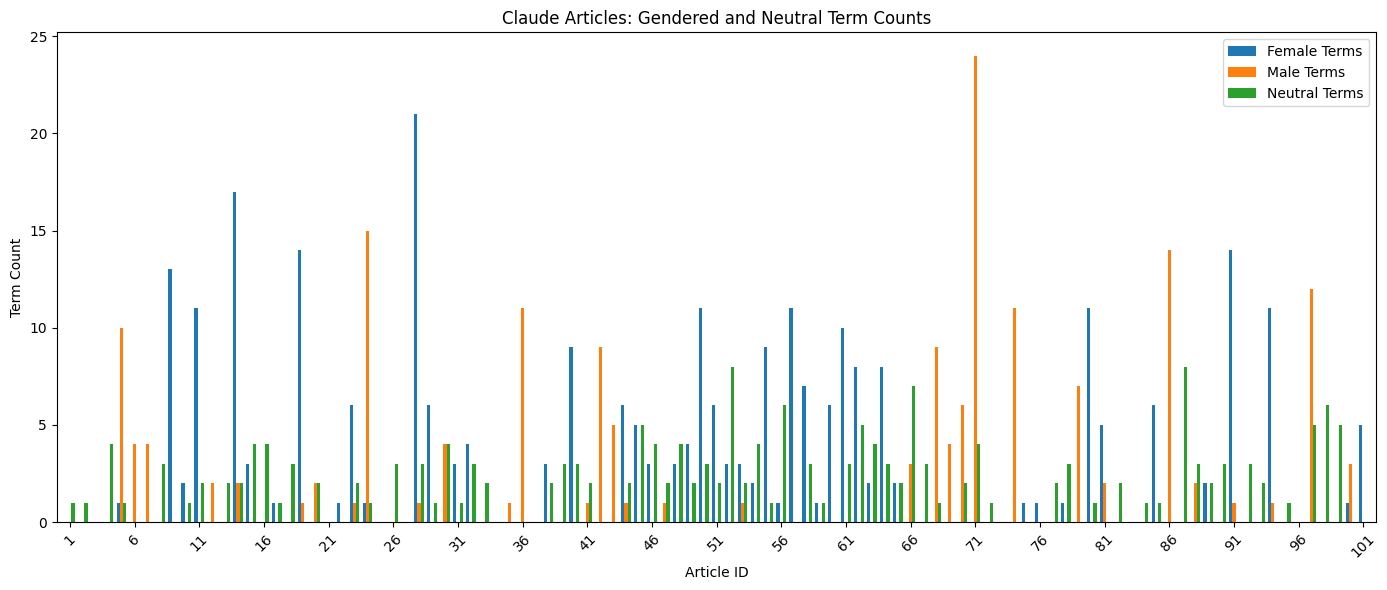


 ChatGPT Articles - Gendered and Neutral Term Counts 
Article ID  Female Term Count  Male Term Count  Neutral Term Count
         1                  0                0                   2
         2                  0                0                   3
         3                  0                0                   1
         4                  0                0                   7
         5                  2               14                   1
         6                  0                2                   3
         7                  0                1                   2
         8                  0                0                   4
         9                 16                0                   1
        10                  6                1                   5
        11                 14                0                   5
        12                  0                6                   1
        13                  0                0                   7
       

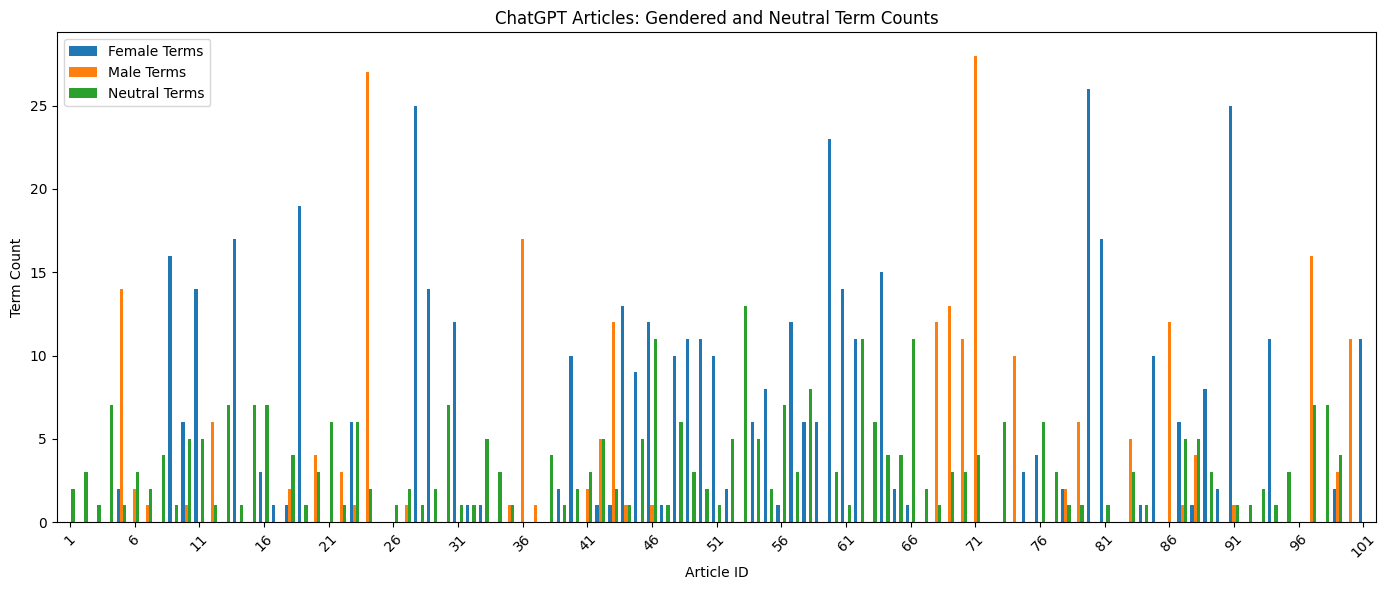

In [97]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the generated articles
deepseek_path = 'generated_articles/nyt_deepseek.json'
claude_path = 'generated_articles/nyt_claude.json'
chatgpt_path = 'generated_articles/nyt_chatgpt.json'

# Gendered and neutral term lists
female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]
neutral_terms = [
    'they', 'them', 'their', 'theirs', 'themselves',
    'parent', 'parents', 'child', 'children', 'sibling', 'siblings',
    'person', 'people', 'individual', 'individuals',
    'spouse', 'partner', 'partners',
    'cousin', 'cousins'
]

# Compile regex patterns
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)
neutral_terms_pattern = re.compile(r'\b(' + '|'.join(neutral_terms) + r')\b', flags=re.IGNORECASE)

# Load articles from file
def load_articles(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

deepseek_articles = load_articles(deepseek_path)
claude_articles = load_articles(claude_path)
chatgpt_articles = load_articles(chatgpt_path)

# Count terms
def count_terms_per_article(articles):
    article_ids = []
    female_counts = []
    male_counts = []
    neutral_counts = []
    for article_id, text in articles.items():
        f_count = len(female_terms_pattern.findall(text))
        m_count = len(male_terms_pattern.findall(text))
        n_count = len(neutral_terms_pattern.findall(text))
        article_ids.append(article_id)
        female_counts.append(f_count)
        male_counts.append(m_count)
        neutral_counts.append(n_count)
    return pd.DataFrame({
        'Article ID': article_ids,
        'Female Term Count': female_counts,
        'Male Term Count': male_counts,
        'Neutral Term Count': neutral_counts
    })

# Apply counting
deepseek_df = count_terms_per_article(deepseek_articles)
claude_df = count_terms_per_article(claude_articles)
chatgpt_df = count_terms_per_article(chatgpt_articles)

# Plot
def plot_all_terms(df, model_name):
    fig, ax = plt.subplots(figsize=(14, 6))
    bar_width = 0.25

    # Convert article IDs to integers
    article_ids_numeric = list(map(int, df['Article ID']))
    female_counts = df['Female Term Count'].tolist()
    male_counts = df['Male Term Count'].tolist()
    neutral_counts = df['Neutral Term Count'].tolist()

    # Plot bars centered on article IDs
    ax.bar(
        [aid - bar_width for aid in article_ids_numeric],
        female_counts, width=bar_width, label='Female Terms'
    )
    ax.bar(
        article_ids_numeric,
        male_counts, width=bar_width, label='Male Terms'
    )
    ax.bar(
        [aid + bar_width for aid in article_ids_numeric],
        neutral_counts, width=bar_width, label='Neutral Terms'
    )

    ax.set_xlabel('Article ID')
    ax.set_ylabel('Term Count')
    ax.set_title(f'{model_name} Articles: Gendered and Neutral Term Counts')

    # Show every Nth x-tick to reduce clutter
    N = 5
    ax.set_xticks([aid for i, aid in enumerate(article_ids_numeric) if i % N == 0])
    ax.set_xticklabels([aid for i, aid in enumerate(article_ids_numeric) if i % N == 0], rotation=45)

    # Expand limits to use full width
    ax.set_xlim(min(article_ids_numeric) - 1, max(article_ids_numeric) + 1)
    ax.legend()
    plt.tight_layout()
    plt.show()


# Print + plot
print("\n DeepSeek Articles - Gendered and Neutral Term Counts ")
print(deepseek_df.to_string(index=False))
plot_all_terms(deepseek_df, "DeepSeek")

print("\n Claude Articles - Gendered and Neutral Term Counts ")
print(claude_df.to_string(index=False))
plot_all_terms(claude_df, "Claude")

print("\n ChatGPT Articles - Gendered and Neutral Term Counts ")
print(chatgpt_df.to_string(index=False))
plot_all_terms(chatgpt_df, "ChatGPT")


In [98]:
import re

def add_total_words_and_proportions(df, articles):
    df = df.copy()
    total_words = []
    for aid in df['Article ID']:
        text = articles[aid]
        words = re.findall(r'\w+', text)
        total_words.append(len(words))

    df['Total Words'] = total_words
    df['% Female'] = df['Female Term Count'] / df['Total Words']
    df['% Male'] = df['Male Term Count'] / df['Total Words']
    df['% Neutral'] = df['Neutral Term Count'] / df['Total Words']

    gendered_total = df['Female Term Count'] + df['Male Term Count']
    df['% Female Gendered'] = df['Female Term Count'] / gendered_total
    df['% Male Gendered'] = df['Male Term Count'] / gendered_total

    return df
ref_df = add_total_words_and_proportions(counts_df, articles)
deepseek_df = add_total_words_and_proportions(deepseek_df, deepseek_articles)
claude_df = add_total_words_and_proportions(claude_df, claude_articles)
chatgpt_df = add_total_words_and_proportions(chatgpt_df, chatgpt_articles)


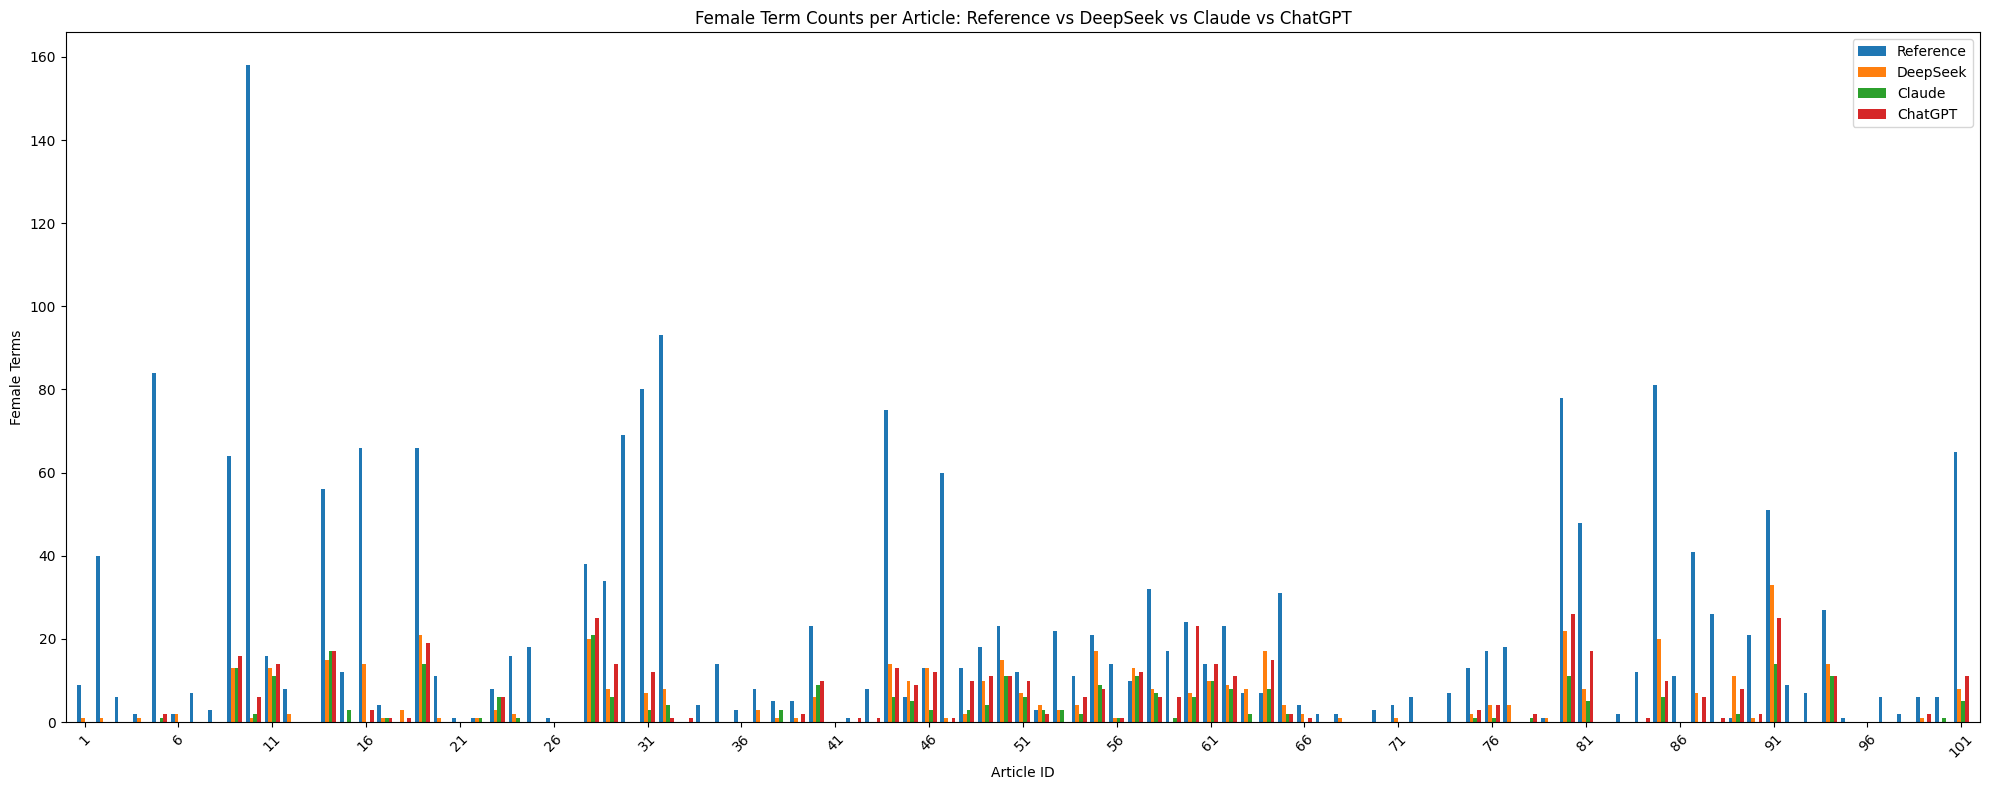

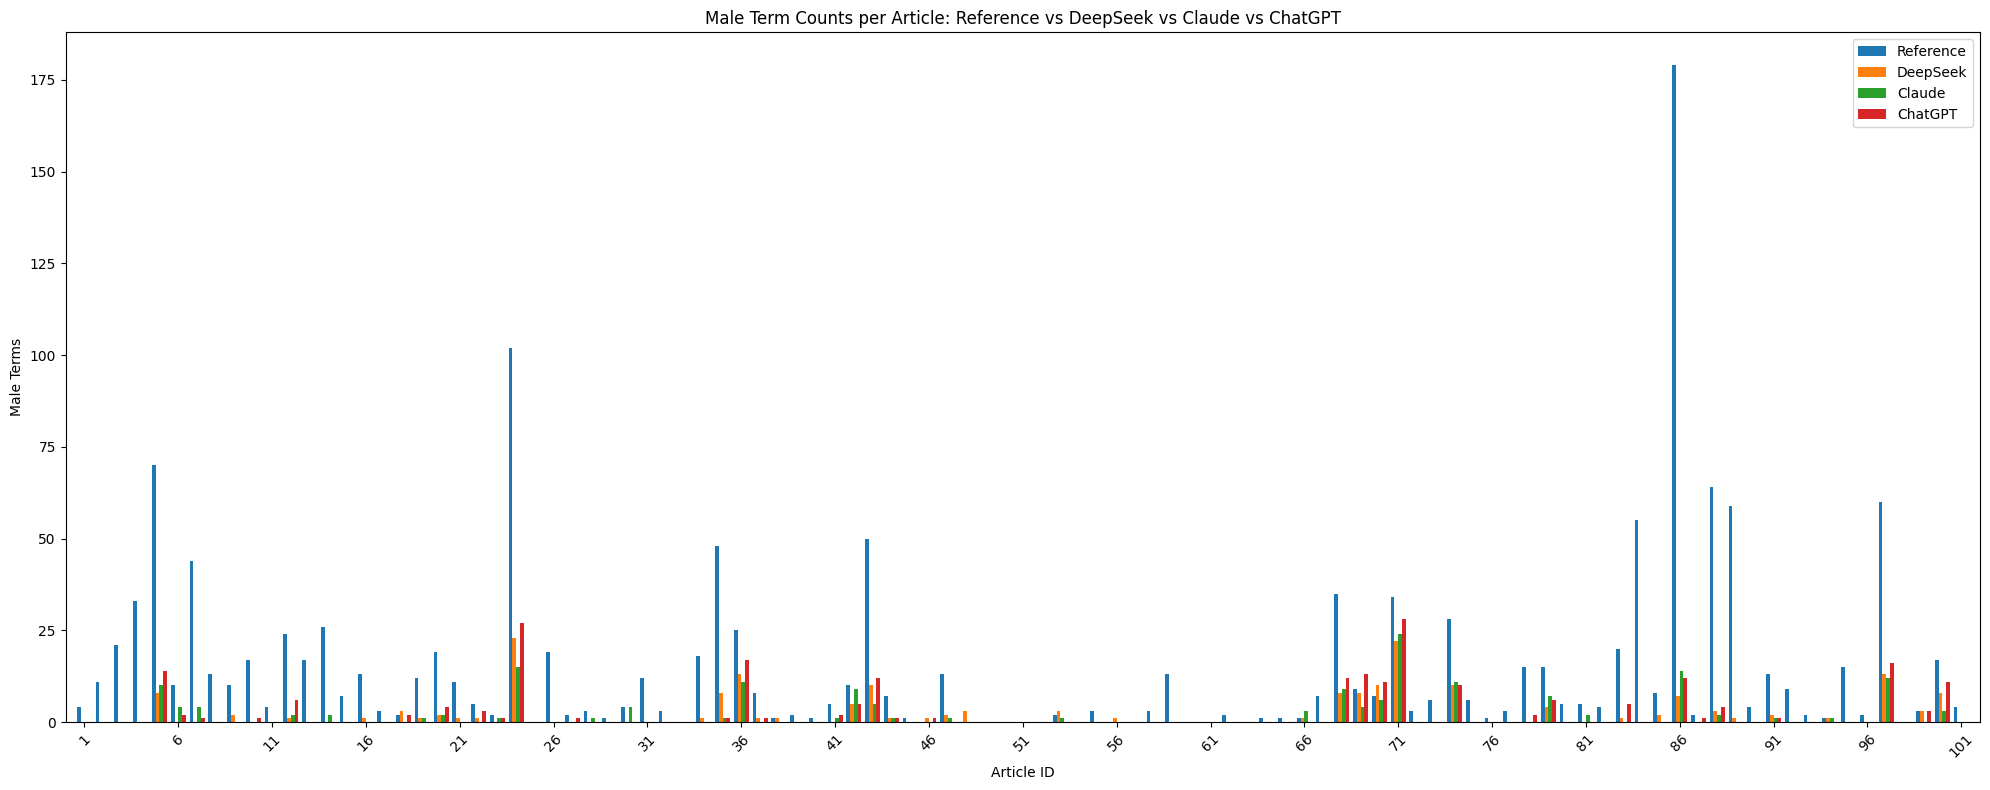

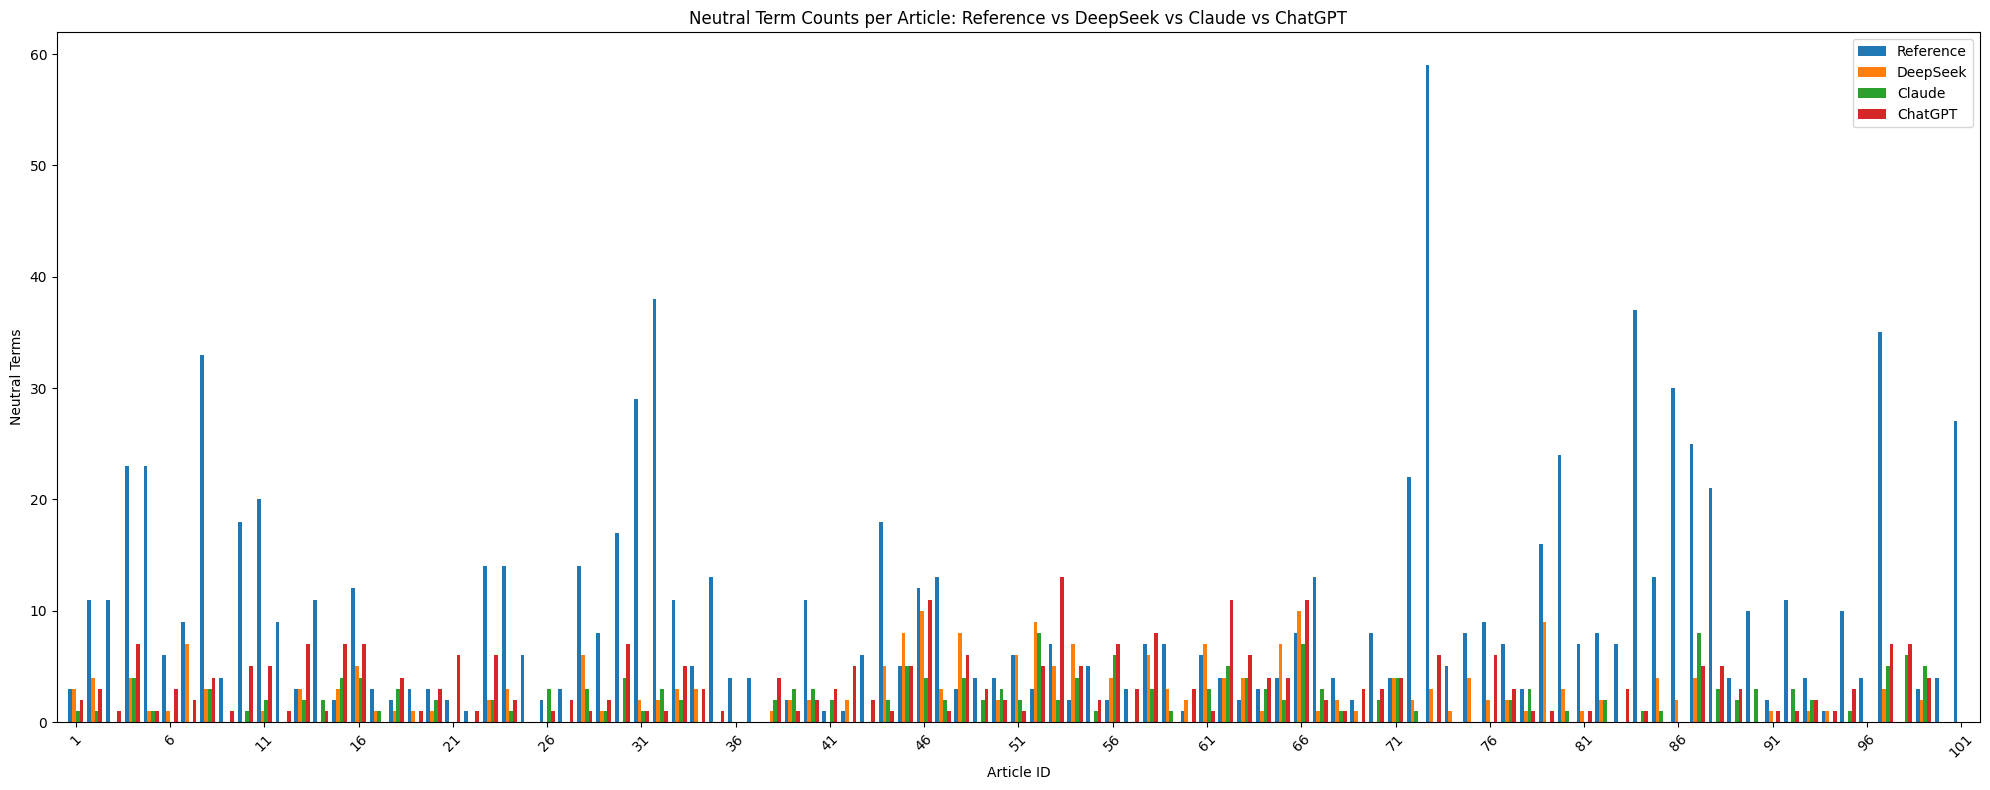

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Sort and align all DataFrames by Article ID
reference_df = counts_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# 2. Combine into long-format with Female, Male, and Neutral counts
records = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])
    records.extend([
        {'Article ID': article_id, 'Model': 'Reference', 'Female Terms': reference_df.loc[i, 'Female Term Count'], 'Male Terms': reference_df.loc[i, 'Male Term Count'], 'Neutral Terms': reference_df.loc[i, 'Neutral Term Count']},
        {'Article ID': article_id, 'Model': 'DeepSeek',  'Female Terms': deepseek_df.loc[i, 'Female Term Count'],  'Male Terms': deepseek_df.loc[i, 'Male Term Count'],  'Neutral Terms': deepseek_df.loc[i, 'Neutral Term Count']},
        {'Article ID': article_id, 'Model': 'Claude',    'Female Terms': claude_df.loc[i, 'Female Term Count'],    'Male Terms': claude_df.loc[i, 'Male Term Count'],    'Neutral Terms': claude_df.loc[i, 'Neutral Term Count']},
        {'Article ID': article_id, 'Model': 'ChatGPT',   'Female Terms': chatgpt_df.loc[i, 'Female Term Count'],   'Male Terms': chatgpt_df.loc[i, 'Male Term Count'],   'Neutral Terms': chatgpt_df.loc[i, 'Neutral Term Count']},
    ])

full_df = pd.DataFrame(records)
full_df = full_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# Models and Article IDs
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)

# Convert article IDs to numeric axis for tight spacing
x = list(map(int, articles))

# Helper function to plot a term category
def plot_term_group(term_label, title):
    fig, ax = plt.subplots(figsize=(20, 8))
    for i, model in enumerate(models):
        subset = full_df[full_df['Model'] == model]
        ax.bar(
            [aid + (i - 1.5) * bar_width for aid in x],  # center bars using model offset
            subset[term_label],
            width=bar_width,
            label=model
        )
    ax.set_xlabel('Article ID')
    ax.set_ylabel(f'{term_label}')
    ax.set_title(f'{title}: Reference vs DeepSeek vs Claude vs ChatGPT')
    N = 5  # reduce clutter
    ax.set_xticks([aid for idx, aid in enumerate(x) if idx % N == 0])
    ax.set_xticklabels([aid for idx, aid in enumerate(x) if idx % N == 0], rotation=45)
    ax.set_xlim(min(x) - 1, max(x) + 1)
    ax.legend()
    plt.tight_layout()
    plt.show()

# 3. Plot each category
plot_term_group('Female Terms', 'Female Term Counts per Article')
plot_term_group('Male Terms', 'Male Term Counts per Article')
plot_term_group('Neutral Terms', 'Neutral Term Counts per Article')


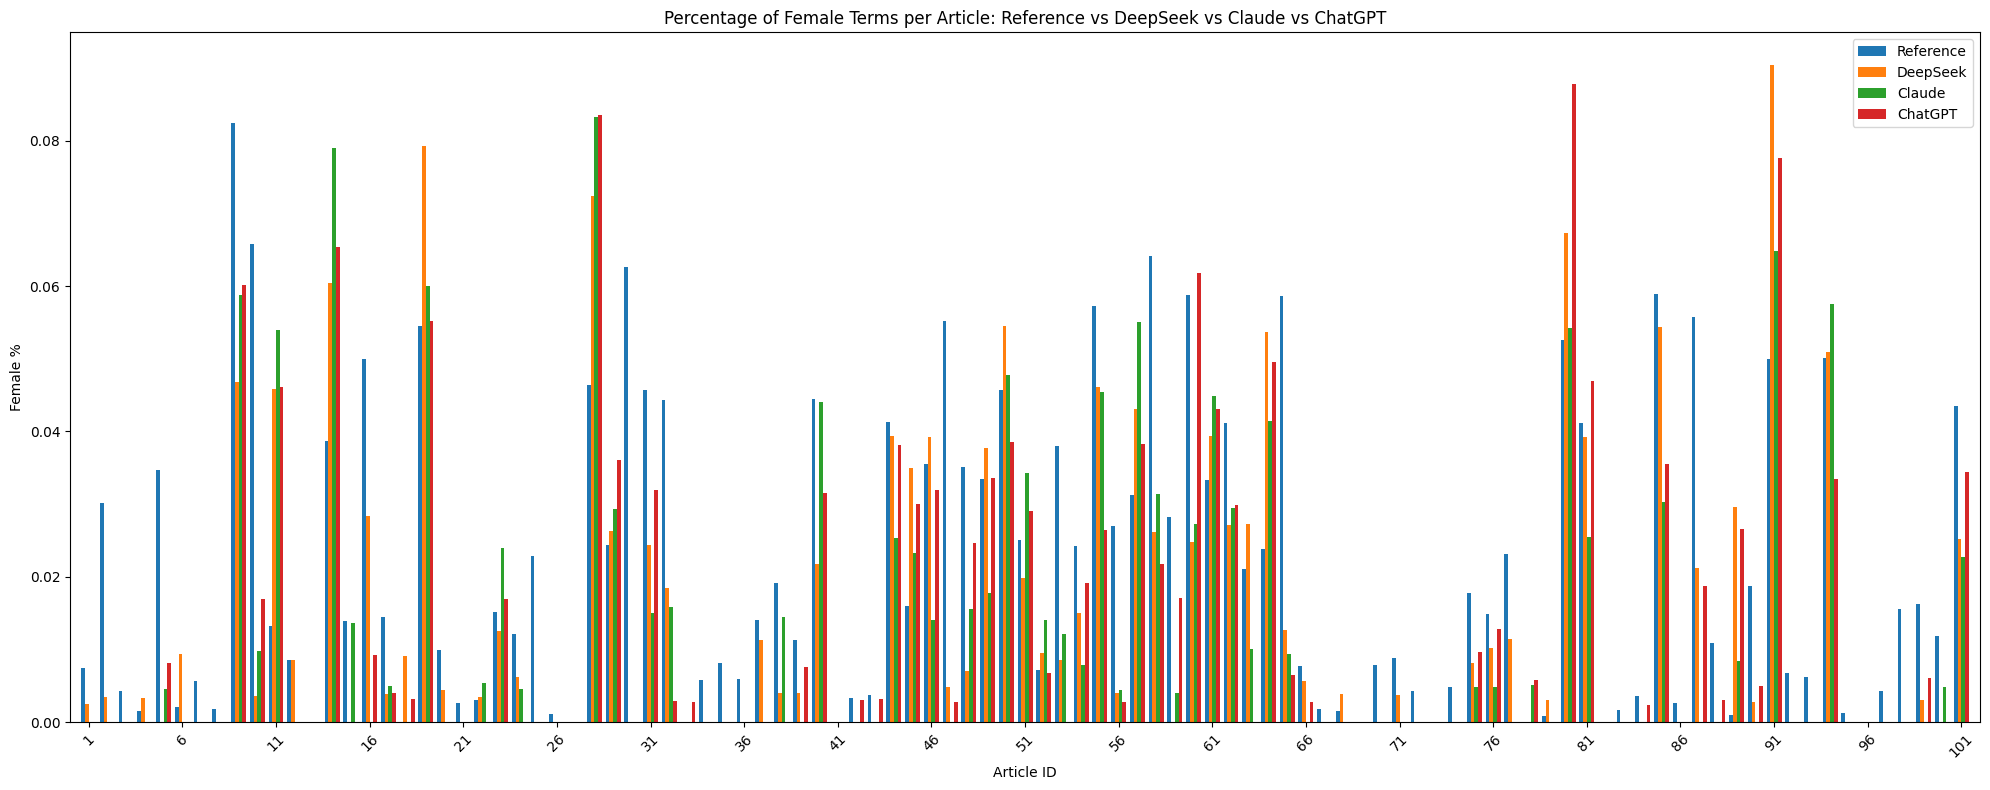

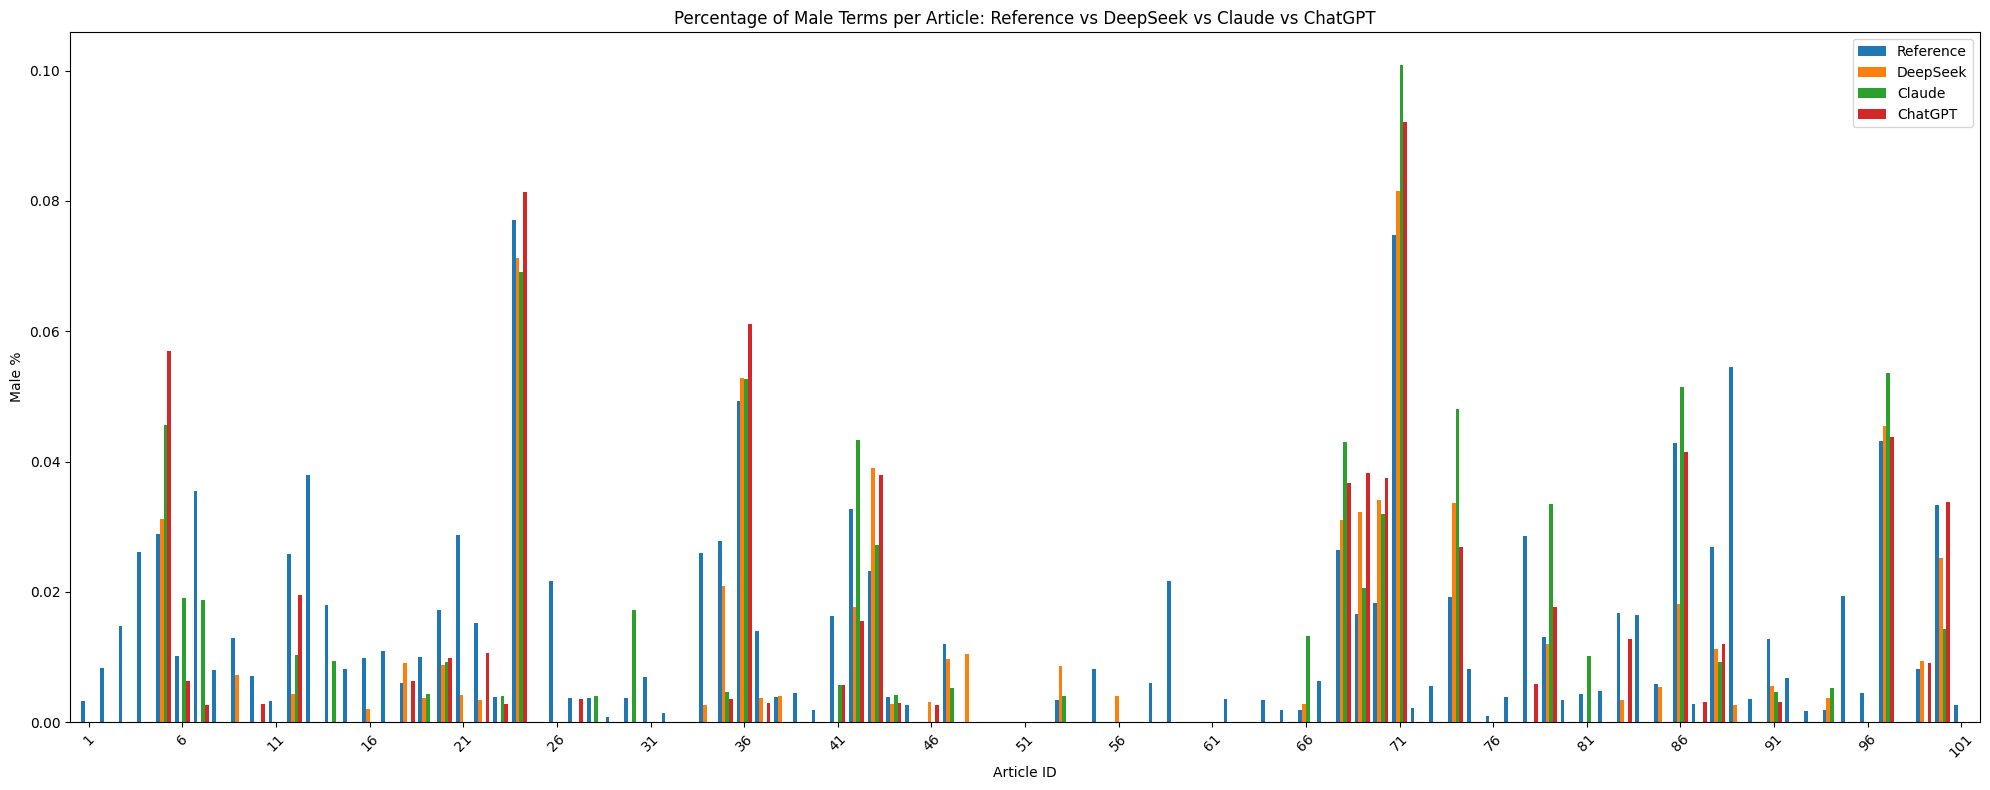

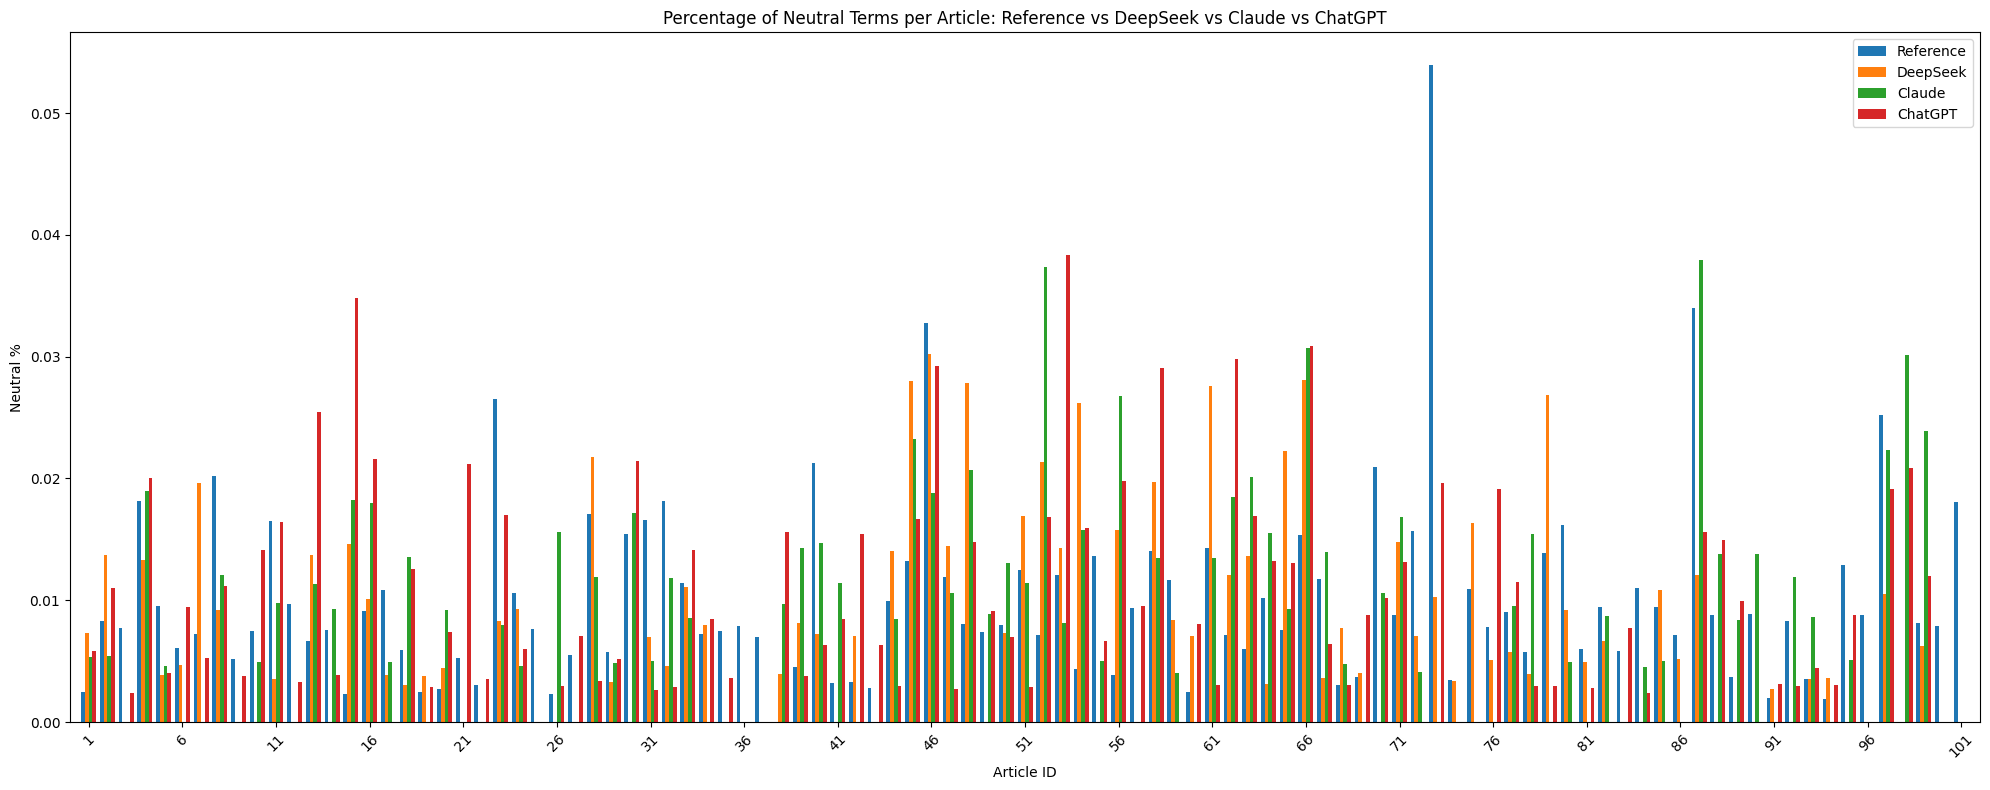

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure DataFrames are sorted by Article ID
reference_df = ref_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# 2. Merge percentage-based data into long format
records_pct = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])
    records_pct.extend([
        {'Article ID': article_id, 'Model': 'Reference', 'Female %': reference_df.loc[i, '% Female'], 'Male %': reference_df.loc[i, '% Male'], 'Neutral %': reference_df.loc[i, '% Neutral']},
        {'Article ID': article_id, 'Model': 'DeepSeek',  'Female %': deepseek_df.loc[i, '% Female'],  'Male %': deepseek_df.loc[i, '% Male'],  'Neutral %': deepseek_df.loc[i, '% Neutral']},
        {'Article ID': article_id, 'Model': 'Claude',    'Female %': claude_df.loc[i, '% Female'],    'Male %': claude_df.loc[i, '% Male'],    'Neutral %': claude_df.loc[i, '% Neutral']},
        {'Article ID': article_id, 'Model': 'ChatGPT',   'Female %': chatgpt_df.loc[i, '% Female'],   'Male %': chatgpt_df.loc[i, '% Male'],   'Neutral %': chatgpt_df.loc[i, '% Neutral']},
    ])

full_pct_df = pd.DataFrame(records_pct)
full_pct_df = full_pct_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# 3. Define plotting parameters
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_pct_df['Article ID'].unique())
x = list(map(int, articles))
bar_width = 0.2

# 4. Helper function to plot any term percentage
def plot_term_percentage(term_label, title):
    fig, ax = plt.subplots(figsize=(20, 8))
    for i, model in enumerate(models):
        subset = full_pct_df[full_pct_df['Model'] == model]
        ax.bar(
            [aid + (i - 1.5) * bar_width for aid in x],
            subset[term_label],
            width=bar_width,
            label=model
        )
    ax.set_xlabel('Article ID')
    ax.set_ylabel(f'{term_label}')
    ax.set_title(f'{title}: Reference vs DeepSeek vs Claude vs ChatGPT')
    N = 5  # Show every Nth article
    ax.set_xticks([aid for idx, aid in enumerate(x) if idx % N == 0])
    ax.set_xticklabels([aid for idx, aid in enumerate(x) if idx % N == 0], rotation=45)
    ax.set_xlim(min(x) - 1, max(x) + 1)
    ax.legend()
    plt.tight_layout()
    plt.show()

# 5. Plot each percentage category
plot_term_percentage('Female %', 'Percentage of Female Terms per Article')
plot_term_percentage('Male %', 'Percentage of Male Terms per Article')
plot_term_percentage('Neutral %', 'Percentage of Neutral Terms per Article')


In [101]:
print(type(articles))



<class 'list'>


In [102]:
def compute_wasserstein(ref, llm):
    distances = []
    for i in range(len(ref)):
        f1, m1, n1 = ref.loc[i, 'Female Term Count'], ref.loc[i, 'Male Term Count'], ref.loc[i, 'Neutral Term Count']
        f2, m2, n2 = llm.loc[i, 'Female Term Count'], llm.loc[i, 'Male Term Count'], llm.loc[i, 'Neutral Term Count']
        
        total1 = f1 + m1 + n1
        total2 = f2 + m2 + n2

        if total1 == 0 or total2 == 0:
            distances.append(None)
        else:
            p_ref = [f1 / total1, m1 / total1, n1 / total1]
            p_llm = [f2 / total2, m2 / total2, n2 / total2]
            max_diff = max(abs(a - b) for a, b in zip(p_ref, p_llm))
            distances.append(max_diff)
    
    return distances


# Compute distances
deepseek_wd = compute_wasserstein(ref_df, deepseek_df)
claude_wd = compute_wasserstein(ref_df, claude_df)
chatgpt_wd = compute_wasserstein(ref_df, chatgpt_df)


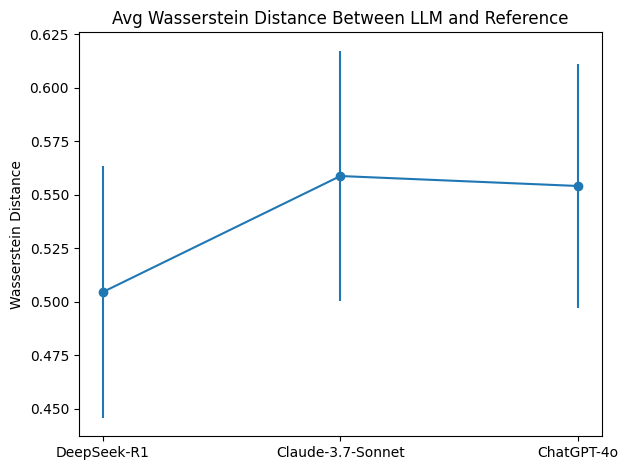

In [103]:
import numpy as np
import seaborn as sns

def mean_ci(data):
    data = [x for x in data if x is not None]
    mean = np.mean(data)
    ci = 1.96 * np.std(data) / np.sqrt(len(data))
    return mean, ci

models = ['DeepSeek-R1', 'Claude-3.7-Sonnet', 'ChatGPT-4o']
means, cis = zip(*[mean_ci(x) for x in [deepseek_wd, claude_wd, chatgpt_wd]])

plt.errorbar(models, means, yerr=cis, fmt='-o')
plt.ylabel('Wasserstein Distance')
plt.title('Avg Wasserstein Distance Between LLM and Reference')
plt.tight_layout()
plt.show()


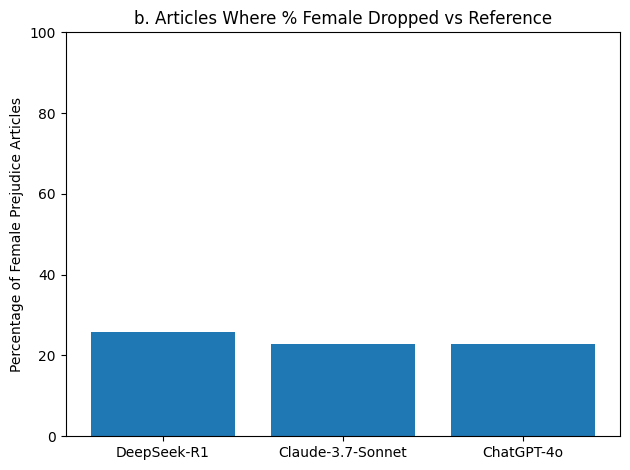

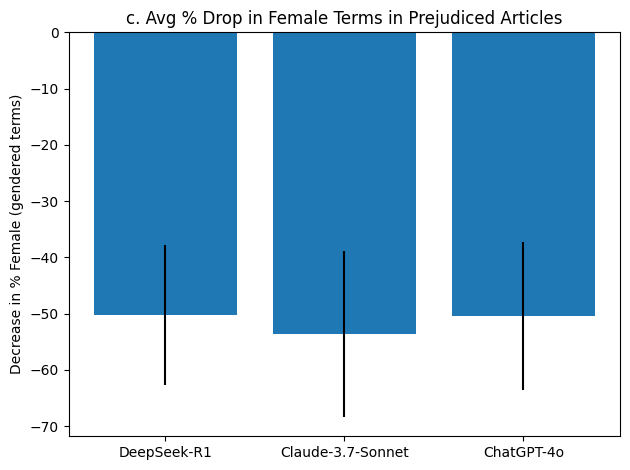

In [104]:
def female_prejudice(ref, llm):
    return np.mean(llm['% Female Gendered'] < ref['% Female Gendered'])

rates = [
    female_prejudice(ref_df, deepseek_df),
    female_prejudice(ref_df, claude_df),
    female_prejudice(ref_df, chatgpt_df)
]

plt.bar(models, [r*100 for r in rates])
plt.ylabel('Percentage of Female Prejudice Articles')
plt.title('b. Articles Where % Female Dropped vs Reference')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

def reduction(ref, llm):
    mask = llm['% Female Gendered'] < ref['% Female Gendered']
    diff = (llm['% Female Gendered'] - ref['% Female Gendered'])[mask]
    return np.mean(diff) * 100, 1.96 * np.std(diff) * 100 / np.sqrt(len(diff))

reductions, ci = zip(*[reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])

plt.bar(models, reductions, yerr=ci)
plt.ylabel('Decrease in % Female (gendered terms)')
plt.title('c. Avg % Drop in Female Terms in Prejudiced Articles')
plt.tight_layout()
plt.show()

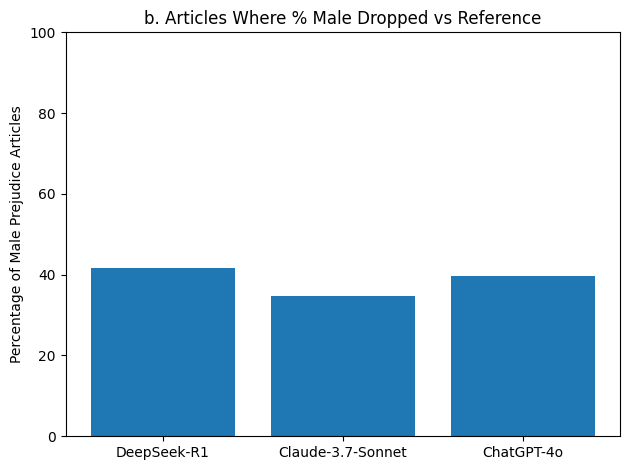

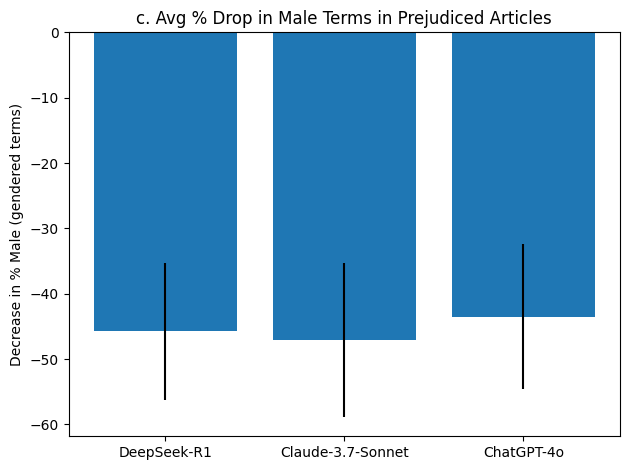

In [105]:
def male_prejudice(ref, llm):
    return np.mean(llm['% Male Gendered'] < ref['% Male Gendered'])

rates = [
    male_prejudice(ref_df, deepseek_df),
    male_prejudice(ref_df, claude_df),
    male_prejudice(ref_df, chatgpt_df)
]

plt.bar(models, [r*100 for r in rates])
plt.ylabel('Percentage of Male Prejudice Articles')
plt.title('b. Articles Where % Male Dropped vs Reference')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

def reduction(ref, llm):
    mask = llm['% Male Gendered'] < ref['% Male Gendered']
    diff = (llm['% Male Gendered'] - ref['% Male Gendered'])[mask]
    return np.mean(diff) * 100, 1.96 * np.std(diff) * 100 / np.sqrt(len(diff))

reductions, ci = zip(*[reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])

plt.bar(models, reductions, yerr=ci)
plt.ylabel('Decrease in % Male (gendered terms)')
plt.title('c. Avg % Drop in Male Terms in Prejudiced Articles')
plt.tight_layout()
plt.show()

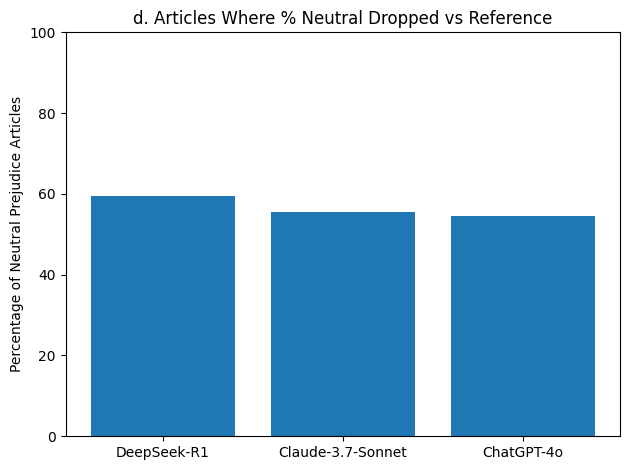

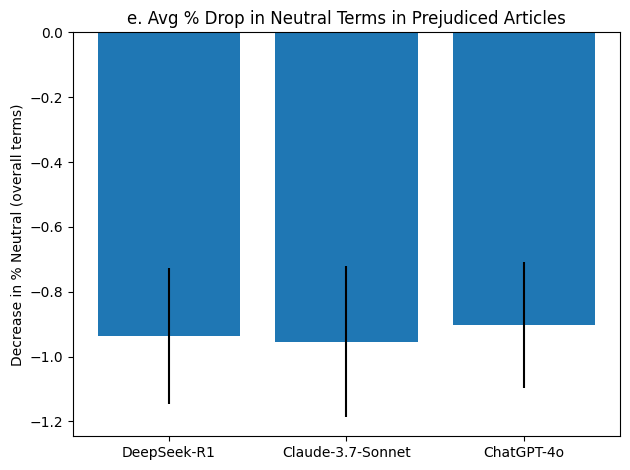

In [106]:
# d. Articles Where % Neutral Dropped vs Reference
def neutral_prejudice(ref, llm):
    return np.mean(llm['% Neutral'] < ref['% Neutral'])

neutral_rates = [
    neutral_prejudice(ref_df, deepseek_df),
    neutral_prejudice(ref_df, claude_df),
    neutral_prejudice(ref_df, chatgpt_df)
]

plt.bar(models, [r * 100 for r in neutral_rates])
plt.ylabel('Percentage of Neutral Prejudice Articles')
plt.title('d. Articles Where % Neutral Dropped vs Reference')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# e. Avg % Drop in Neutral Terms in Prejudiced Articles
def neutral_reduction(ref, llm):
    mask = llm['% Neutral'] < ref['% Neutral']
    diff = (llm['% Neutral'] - ref['% Neutral'])[mask]
    return np.mean(diff) * 100, 1.96 * np.std(diff) * 100 / np.sqrt(len(diff))

neutral_reductions, neutral_ci = zip(*[
    neutral_reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]
])

plt.bar(models, neutral_reductions, yerr=neutral_ci)
plt.ylabel('Decrease in % Neutral (overall terms)')
plt.title('e. Avg % Drop in Neutral Terms in Prejudiced Articles')
plt.tight_layout()
plt.show()


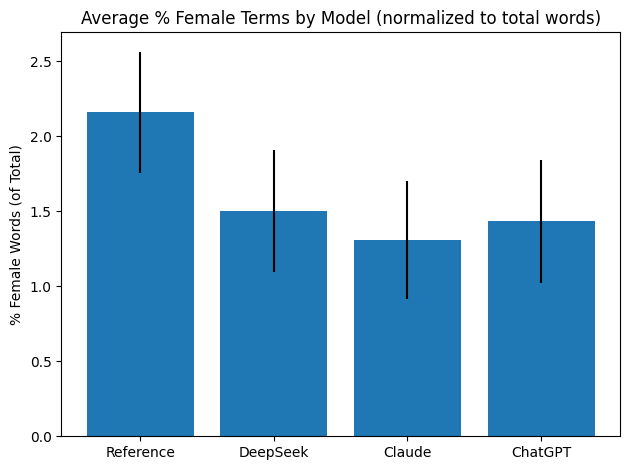

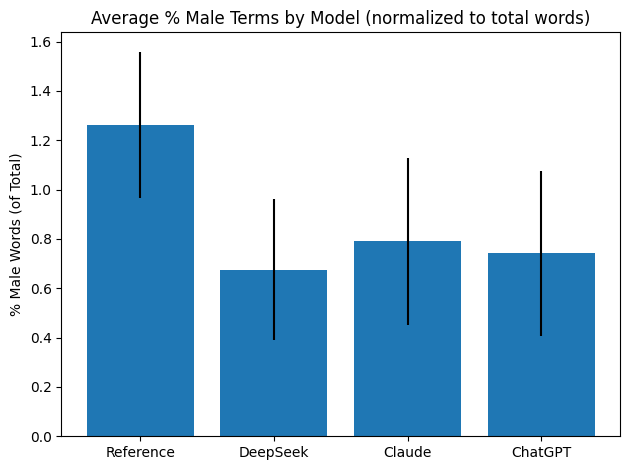

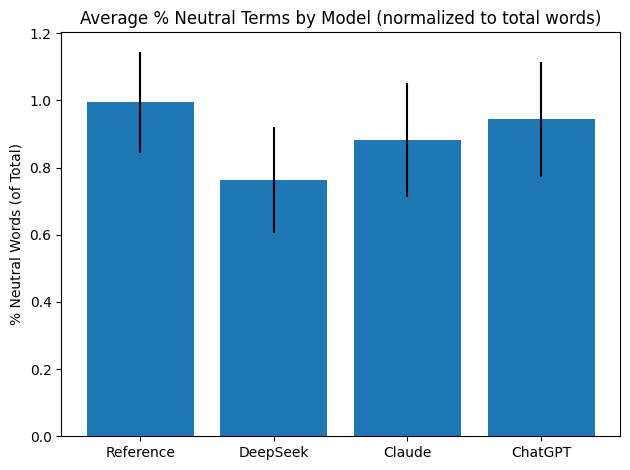

In [107]:
def plot_percent_words(df_list, label):
    models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
    vals = [df[f'% {label}'].mean() * 100 for df in df_list]
    ci = [1.96 * df[f'% {label}'].std() * 100 / np.sqrt(len(df)) for df in df_list]
    
    plt.bar(models, vals, yerr=ci)
    plt.ylabel(f'% {label} Words (of Total)')
    plt.title(f'Average % {label} Terms by Model (normalized to total words)')
    plt.tight_layout()
    plt.show()

plot_percent_words([ref_df, deepseek_df, claude_df, chatgpt_df], "Female")
plot_percent_words([ref_df, deepseek_df, claude_df, chatgpt_df], "Male")
plot_percent_words([ref_df, deepseek_df, claude_df, chatgpt_df], "Neutral")



In [108]:
from scipy.stats import ttest_rel
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

def compute_ttest(ref_vals, llm_vals):
    mask = (ref_vals.notnull()) & (llm_vals.notnull())
    ref = ref_vals[mask]
    llm = llm_vals[mask]
    stat, pval = ttest_rel(ref, llm)
    diffs = llm - ref
    mean_diff = diffs.mean()
    ci = 1.96 * diffs.std() / np.sqrt(len(diffs))
    return mean_diff * 100, ci * 100, pval

# Store results
results = []

for label, llm_df in [('DeepSeek', deepseek_df), ('Claude', claude_df), ('ChatGPT', chatgpt_df)]:
    f_mean, f_ci, f_p = compute_ttest(ref_df['% Female'], llm_df['% Female'])
    m_mean, m_ci, m_p = compute_ttest(ref_df['% Male'], llm_df['% Male'])
    n_mean, n_ci, n_p = compute_ttest(ref_df['% Neutral'], llm_df['% Neutral'])

    results.append({
        'Model': label,
        'Δ % Female (mean ± CI)': f"{f_mean:.2f}% ± {f_ci:.2f}%",
        'p (female)': f"{f_p:.4f}",
        'Δ % Male (mean ± CI)': f"{m_mean:.2f}% ± {m_ci:.2f}%",
        'p (male)': f"{m_p:.4f}",
        'Δ % Neutral (mean ± CI)': f"{n_mean:.2f}% ± {n_ci:.2f}%",
        'p (neutral)': f"{n_p:.4f}"
    })

# Create Markdown table
md_table = "| Model | Δ % Female (mean ± CI) | p (female) | Δ % Male (mean ± CI) | p (male) | Δ % Neutral (mean ± CI) | p (neutral) |\n"
md_table += "|--------|-------------------------|-------------|------------------------|-----------|--------------------------|--------------|\n"
for row in results:
    md_table += f"| {row['Model']} | {row['Δ % Female (mean ± CI)']} | {row['p (female)']} | {row['Δ % Male (mean ± CI)']} | {row['p (male)']} | {row['Δ % Neutral (mean ± CI)']} | {row['p (neutral)']} |\n"

display(Markdown(md_table))


| Model | Δ % Female (mean ± CI) | p (female) | Δ % Male (mean ± CI) | p (male) | Δ % Neutral (mean ± CI) | p (neutral) |
|--------|-------------------------|-------------|------------------------|-----------|--------------------------|--------------|
| DeepSeek | -0.66% ± 0.58% | 0.0278 | -0.59% ± 0.37% | 0.0025 | -0.23% ± 0.23% | 0.0494 |
| Claude | -0.85% ± 0.55% | 0.0032 | -0.47% ± 0.41% | 0.0260 | -0.11% ± 0.24% | 0.3690 |
| ChatGPT | -0.73% ± 0.58% | 0.0161 | -0.52% ± 0.40% | 0.0129 | -0.05% ± 0.23% | 0.6681 |


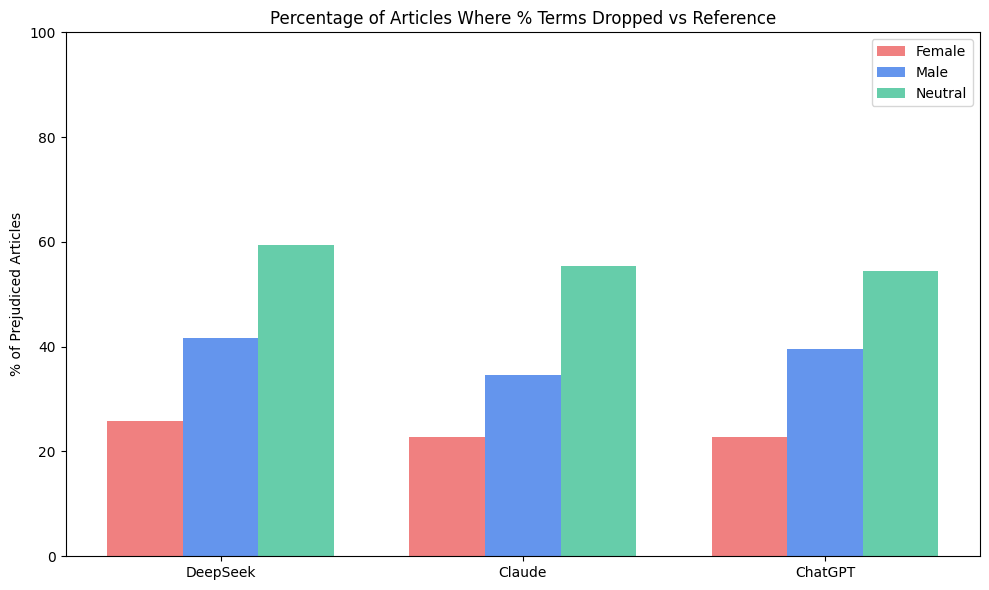

In [109]:
models = ['DeepSeek', 'Claude', 'ChatGPT']
bar_width = 0.25
x = np.arange(len(models))

# Compute prejudice rates
female_rates = [female_prejudice(ref_df, d) * 100 for d in [deepseek_df, claude_df, chatgpt_df]]
male_rates   = [male_prejudice(ref_df, d) * 100 for d in [deepseek_df, claude_df, chatgpt_df]]
neutral_rates= [neutral_prejudice(ref_df, d) * 100 for d in [deepseek_df, claude_df, chatgpt_df]]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, female_rates, width=bar_width, label='Female', color='lightcoral')
plt.bar(x,              male_rates,   width=bar_width, label='Male',   color='cornflowerblue')
plt.bar(x + bar_width,  neutral_rates,width=bar_width, label='Neutral',color='mediumaquamarine')
plt.xticks(x, models)
plt.ylabel('% of Prejudiced Articles')
plt.title('Percentage of Articles Where % Terms Dropped vs Reference')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()


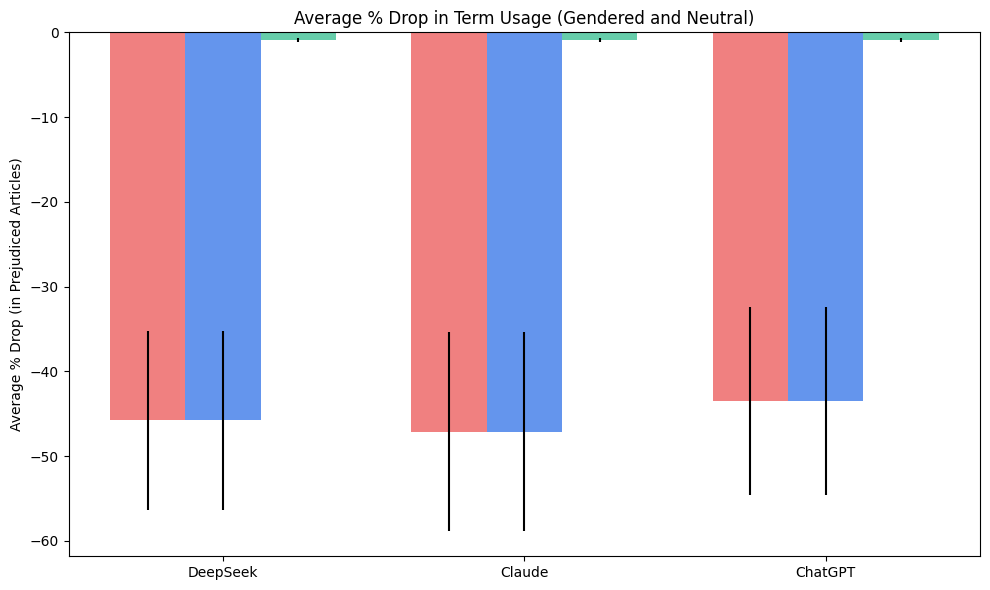

In [110]:
# Compute reductions + confidence intervals
female_red, female_ci = zip(*[reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])
male_red, male_ci     = zip(*[reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])
neutral_red, neutral_ci = zip(*[neutral_reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, female_red, yerr=female_ci, width=bar_width, label='Female', color='lightcoral')
plt.bar(x,             male_red,   yerr=male_ci,   width=bar_width, label='Male',   color='cornflowerblue')
plt.bar(x + bar_width, neutral_red,yerr=neutral_ci,width=bar_width, label='Neutral',color='mediumaquamarine')
plt.xticks(x, models)
plt.ylabel('Average % Drop (in Prejudiced Articles)')
plt.title('Average % Drop in Term Usage (Gendered and Neutral)')
plt.tight_layout()
plt.show()


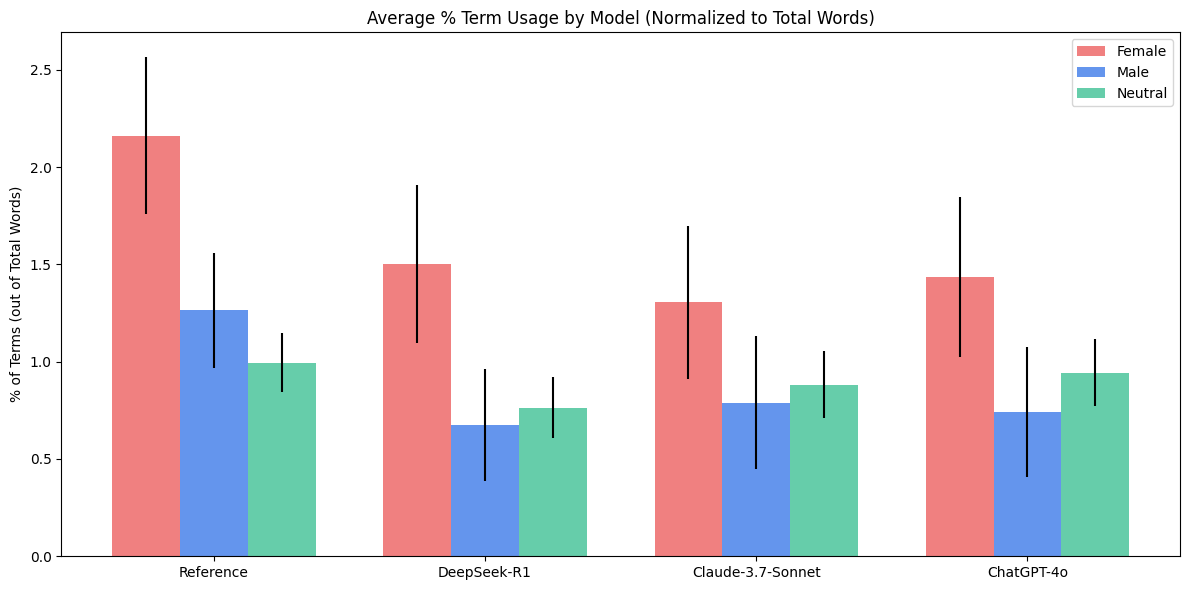

In [111]:
def avg_percent(df_list, label):
    return [df[f'% {label}'].mean() * 100 for df in df_list]

def ci_percent(df_list, label):
    return [1.96 * df[f'% {label}'].std() * 100 / np.sqrt(len(df)) for df in df_list]

df_list = [ref_df, deepseek_df, claude_df, chatgpt_df]
models_all = ['Reference', 'DeepSeek-R1', 'Claude-3.7-Sonnet', 'ChatGPT-4o']
x_all = np.arange(len(models_all))

# Values and CIs
female_vals = avg_percent(df_list, "Female")
male_vals   = avg_percent(df_list, "Male")
neutral_vals= avg_percent(df_list, "Neutral")

female_ci   = ci_percent(df_list, "Female")
male_ci     = ci_percent(df_list, "Male")
neutral_ci  = ci_percent(df_list, "Neutral")

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x_all - bar_width, female_vals, yerr=female_ci, width=bar_width, label='Female', color='lightcoral')
plt.bar(x_all,             male_vals,   yerr=male_ci,   width=bar_width, label='Male',   color='cornflowerblue')
plt.bar(x_all + bar_width, neutral_vals,yerr=neutral_ci,width=bar_width, label='Neutral',color='mediumaquamarine')
plt.xticks(x_all, models_all)
plt.ylabel('% of Terms (out of Total Words)')
plt.title('Average % Term Usage by Model (Normalized to Total Words)')
plt.tight_layout()
plt.legend()
plt.show()


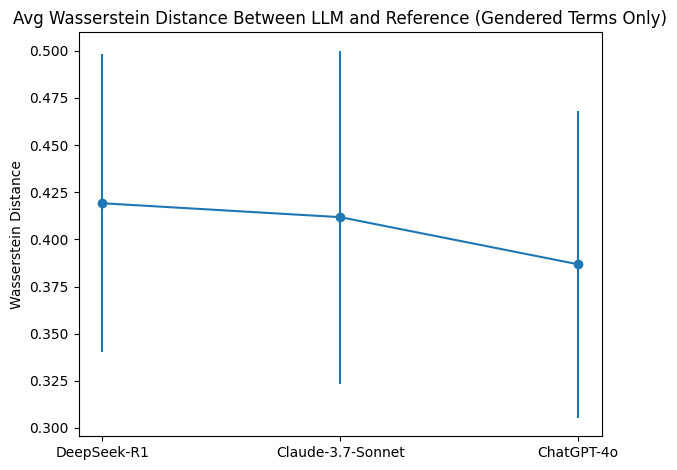

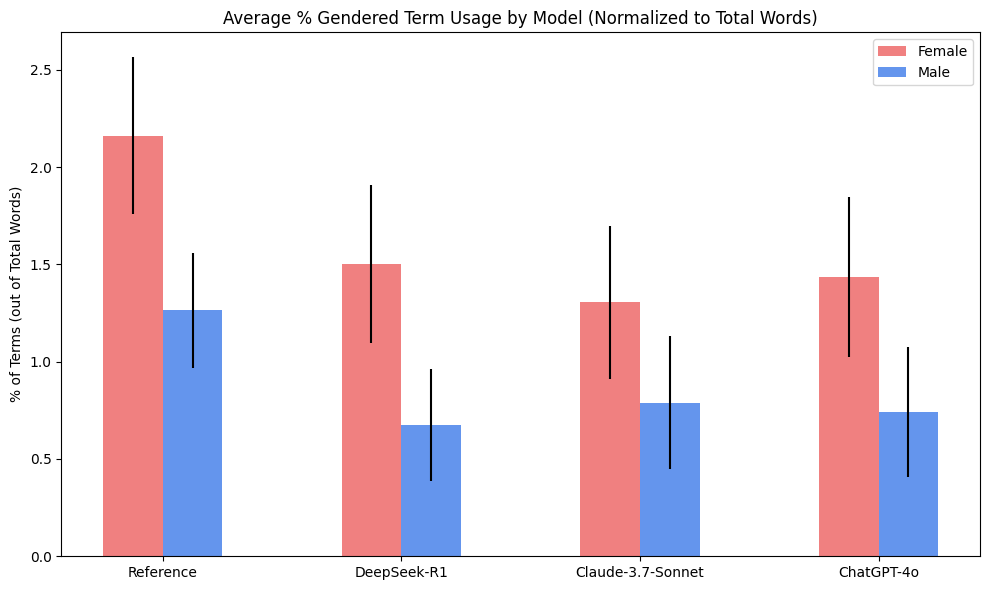

In [112]:
def compute_wasserstein(ref, llm):
    distances = []
    for i in range(len(ref)):
        f1, m1 = ref.loc[i, 'Female Term Count'], ref.loc[i, 'Male Term Count']
        f2, m2 = llm.loc[i, 'Female Term Count'], llm.loc[i, 'Male Term Count']
        
        total1 = f1 + m1
        total2 = f2 + m2

        if total1 == 0 or total2 == 0:
            distances.append(None)
        else:
            p_ref = [f1 / total1, m1 / total1]
            p_llm = [f2 / total2, m2 / total2]
            max_diff = max(abs(a - b) for a, b in zip(p_ref, p_llm))
            distances.append(max_diff)
    
    return distances

# Compute distances
deepseek_wd = compute_wasserstein(ref_df, deepseek_df)
claude_wd   = compute_wasserstein(ref_df, claude_df)
chatgpt_wd  = compute_wasserstein(ref_df, chatgpt_df)

# Plot Wasserstein Distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def mean_ci(data):
    data = [x for x in data if x is not None]
    mean = np.mean(data)
    ci = 1.96 * np.std(data) / np.sqrt(len(data))
    return mean, ci

models = ['DeepSeek-R1', 'Claude-3.7-Sonnet', 'ChatGPT-4o']
means, cis = zip(*[mean_ci(x) for x in [deepseek_wd, claude_wd, chatgpt_wd]])

plt.errorbar(models, means, yerr=cis, fmt='-o')
plt.ylabel('Wasserstein Distance')
plt.title('Avg Wasserstein Distance Between LLM and Reference (Gendered Terms Only)')
plt.tight_layout()
plt.show()

def avg_percent(df_list, label):
    return [df[f'% {label}'].mean() * 100 for df in df_list]

def ci_percent(df_list, label):
    return [1.96 * df[f'% {label}'].std() * 100 / np.sqrt(len(df)) for df in df_list]

import matplotlib.pyplot as plt

df_list = [ref_df, deepseek_df, claude_df, chatgpt_df]
models_all = ['Reference', 'DeepSeek-R1', 'Claude-3.7-Sonnet', 'ChatGPT-4o']
x_all = np.arange(len(models_all))
bar_width = 0.25

# Values and CIs (only female and male)
female_vals = avg_percent(df_list, "Female")
male_vals   = avg_percent(df_list, "Male")
female_ci   = ci_percent(df_list, "Female")
male_ci     = ci_percent(df_list, "Male")

# Plot (no neutral bar)
plt.figure(figsize=(10, 6))
plt.bar(x_all - bar_width / 2, female_vals, yerr=female_ci, width=bar_width, label='Female', color='lightcoral')
plt.bar(x_all + bar_width / 2, male_vals,   yerr=male_ci,   width=bar_width, label='Male',   color='cornflowerblue')
plt.xticks(x_all, models_all)
plt.ylabel('% of Terms (out of Total Words)')
plt.title('Average % Gendered Term Usage by Model (Normalized to Total Words)')
plt.tight_layout()
plt.legend()
plt.show()


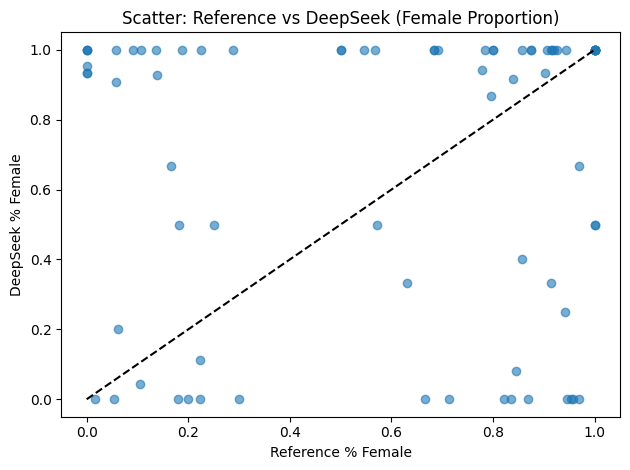

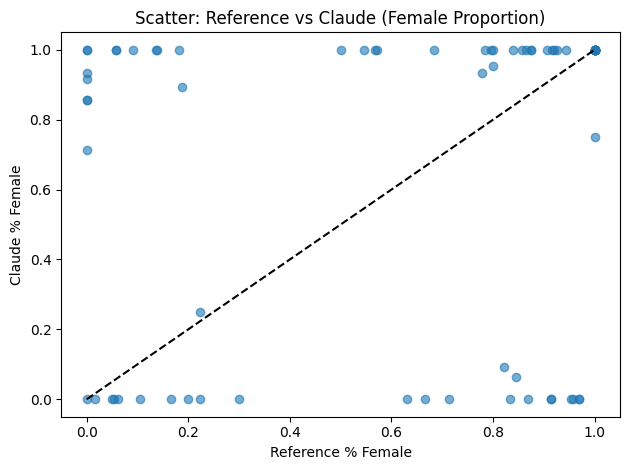

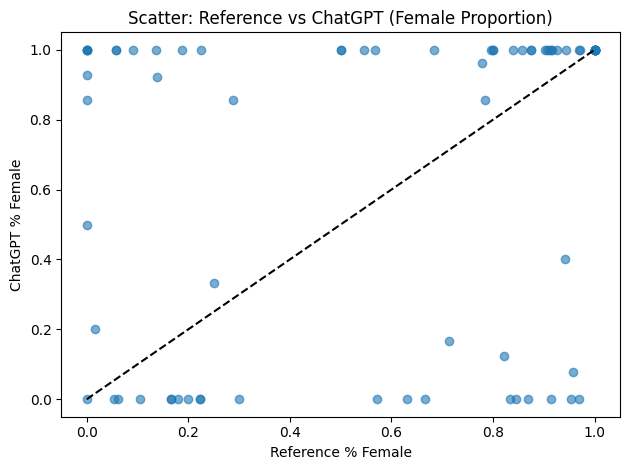

In [113]:
def scatter_plot(ref, llm, model_name):
    plt.scatter(ref['% Female Gendered'], llm['% Female Gendered'], alpha=0.6)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Reference % Female')
    plt.ylabel(f'{model_name} % Female')
    plt.title(f'Scatter: Reference vs {model_name} (Female Proportion)')
    plt.tight_layout()
    plt.show()

scatter_plot(ref_df, deepseek_df, "DeepSeek")
scatter_plot(ref_df, claude_df, "Claude")
scatter_plot(ref_df, chatgpt_df, "ChatGPT")


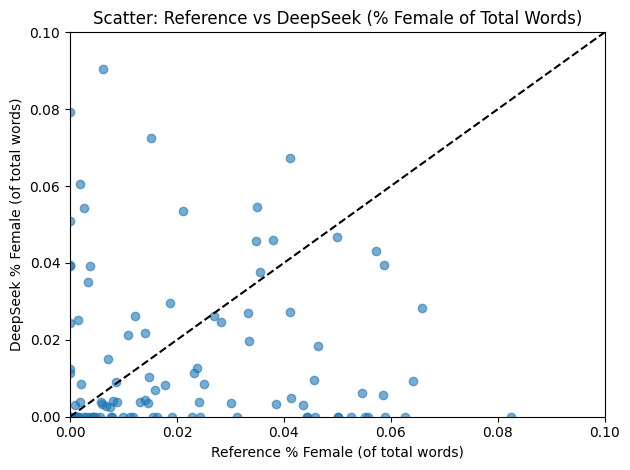

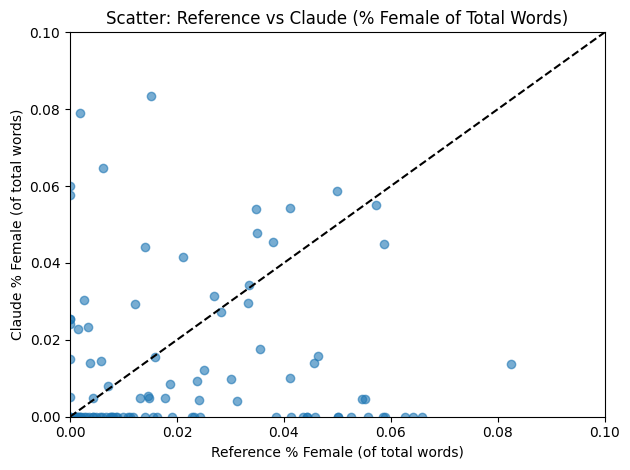

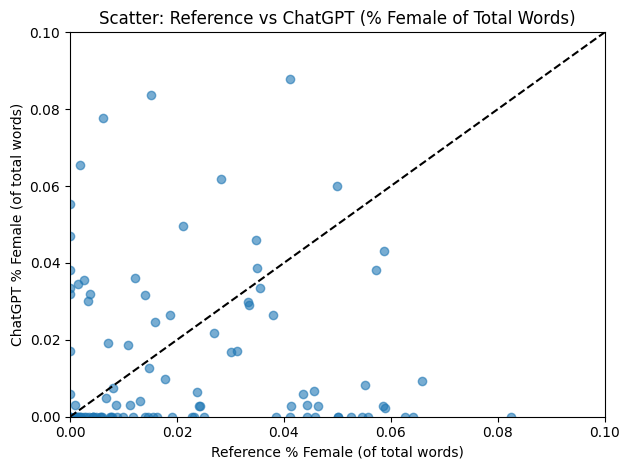

In [114]:
def scatter_plot_total_percent(ref, llm, model_name, xlim=(0, 0.1), ylim=(0, 0.1)):
    plt.scatter(ref['% Female'], llm['% Female'], alpha=0.6)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Reference % Female (of total words)')
    plt.ylabel(f'{model_name} % Female (of total words)')
    plt.title(f'Scatter: Reference vs {model_name} (% Female of Total Words)')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    plt.show()
scatter_plot_total_percent(ref_df, deepseek_df, "DeepSeek")
scatter_plot_total_percent(ref_df, claude_df, "Claude")
scatter_plot_total_percent(ref_df, chatgpt_df, "ChatGPT")
